In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [7]:
# five point summary >> ,min , 25th , 75,50,100, %ile 

In [2]:

salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

In [12]:
np.percentile(salary , [0,25,50,75,100])

array([ 11.  ,  59.  ,  71.  ,  90.75, 140.  ])

In [14]:
df = pd.DataFrame(salary , columns = ['salary'])

In [16]:
df

,salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [27]:
df.describe()

,salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


In [29]:
# to check outliers we have two techqniues 
# distplot 
# boxplot 

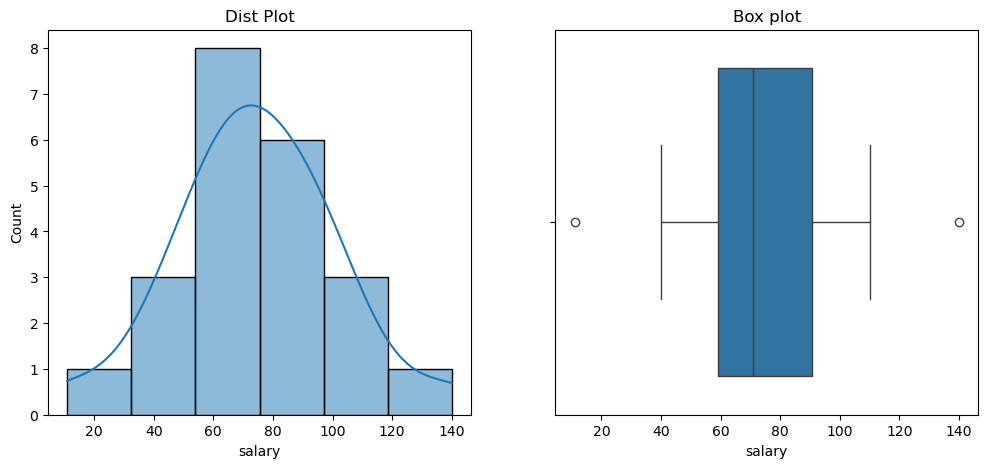

In [35]:

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['salary'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data=df, x = 'salary')
plt.title("Box plot")
plt.show()

In [37]:
# here the distribution is not skewed as the outliers are present on both the sides 

In [39]:
#IN BOX PLOT THERE ARE OUTLIERS
# HOW TO DEAL 

# DROPPING THE OUTLIER 
# CAPPING THE OUTLIER 
# REPLACE WITH MEAN  OR MEDIAN

In [41]:
# DROPPING THE OUTLIER


In [43]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)

In [45]:
IQR = Q3-Q1
lower_fence = Q1-1.5*IQR
upper_fence = Q3 + 1.5*IQR

In [53]:
df_filered =  df[(df.salary >= lower_fence) & (df.salary <= upper_fence)]

In [55]:
df_filered.shape

(20, 1)

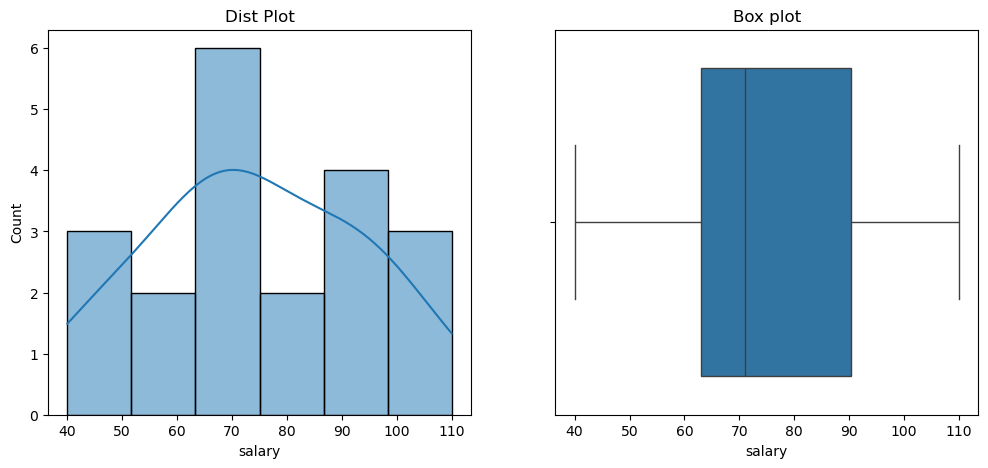

In [59]:

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_filered['salary'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data=df_filered, x = 'salary')
plt.title("Box plot")
plt.show()

In [5]:
# imputaion with mean and median 
#np.where(condition, value_if_true, value_if_false)


In [73]:
df['salary_imputed'] = np.where((df.salary >= upper_fence) | (df.salary <= lower_fence), df['salary'].mean() , df['salary'])

In [75]:
df

,salary,salary_imputed
0,74.318182,74.318182
1,40.000000,40.000000
2,45.000000,45.000000
3,68.000000,68.000000
4,65.000000,65.000000
5,68.000000,68.000000
6,78.000000,78.000000
7,90.000000,90.000000
8,57.000000,57.000000
9,74.000000,74.000000


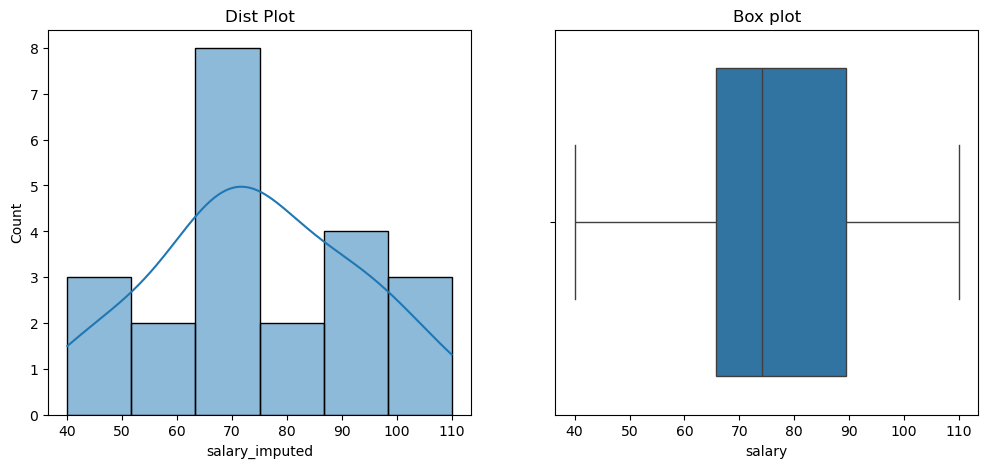

In [85]:

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['salary_imputed'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data= df, x = 'salary')
plt.title("Box plot")
plt.show()

# CAPPING THE OUTLIER 


In [2]:
#replacing  the nearest value which is not outlier 

In [24]:
lower_cap = df['salary'].quantile(0.05) # lower cap is 5th percentile
upper_cap = df['salary'].quantile(0.95) # upper cap is 95th percentile

In [26]:
lower_cap

40.25

In [28]:
upper_cap

109.55

In [32]:
#replace outiler with cap
#replace outliers with cap
# where(condition, [x, y], /)
# Return elements chosen from `x` or `y` depending on `condition`.
#if df['Salary'] < lower_cap satisfied then lower_cap and df['Salary']>upper_cap satisfied then upper_cap
#otherwise keep Salary as it is

In [40]:
df['salary_capped'] = np.where(df['salary'] < lower_cap , lower_cap ,
        np.where(df['salary'] > upper_cap , upper_cap , df['salary']))

In [42]:
df

,salary,salary_capped
0,11,40.25
1,40,40.25
2,45,45.00
3,68,68.00
4,65,65.00
5,68,68.00
6,78,78.00
7,90,90.00
8,57,57.00
9,74,74.00


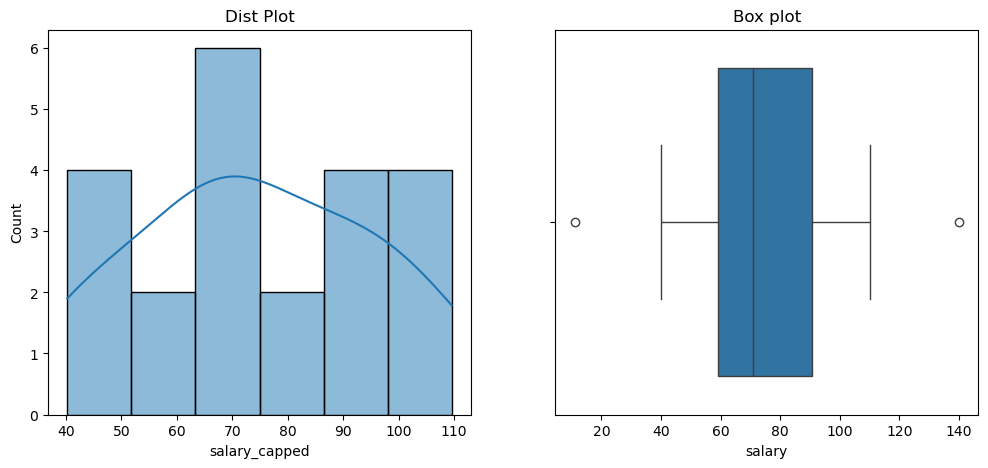

In [44]:

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['salary_capped'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data= df, x = 'salary')
plt.title("Box plot")
plt.show()

In [143]:
df = sns.load_dataset('planets')

In [145]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [147]:
# df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


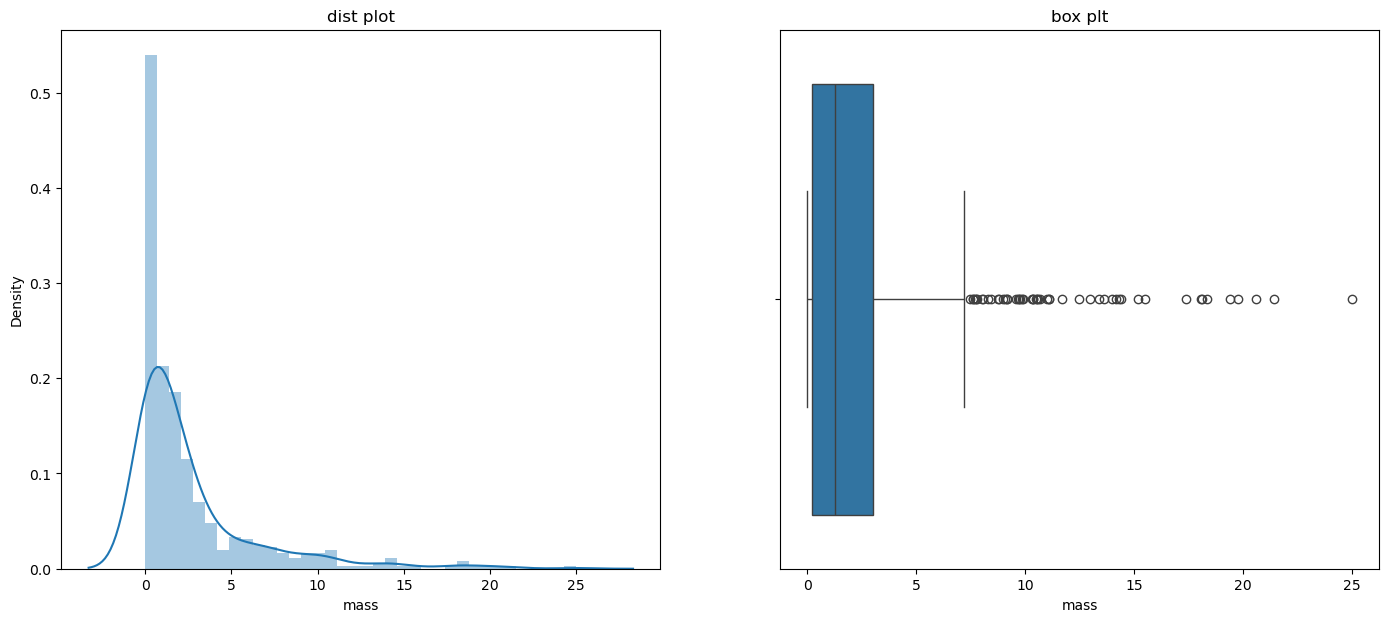

In [153]:
plt.figure(figsize = (17, 7))
plt.subplot(1,2,1)
sns.distplot(df['mass'])
plt.title("dist plot")

plt.subplot(1,2,2)
sns.boxplot(data = df , x = 'mass')
plt.title("box plt")
plt.show()

In [155]:
df.dropna(inplace = True)

In [157]:
df.shape

(498, 6)

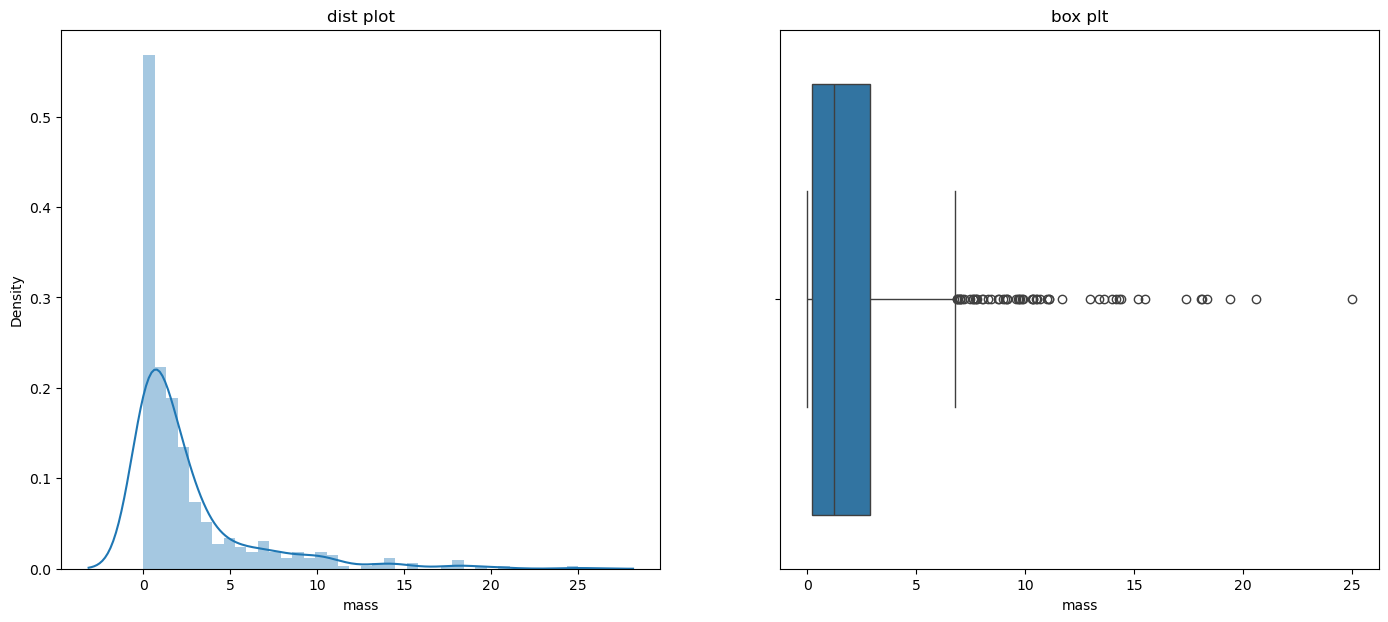

In [159]:
plt.figure(figsize = (17, 7))
plt.subplot(1,2,1)
sns.distplot(df['mass'])
plt.title("dist plot")

plt.subplot(1,2,2)
sns.boxplot(data = df , x = 'mass')
plt.title("box plt")
plt.show()

In [116]:
# dropping outliers

In [161]:
Q1 =  df['mass'].quantile(.25)
Q3 = df['mass'].quantile(.75)

In [163]:
Q1

0.2125

In [165]:
Q3

2.8674999999999997

In [167]:
IQR = Q3 -Q1
lower_fence =  Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 *IQR

In [169]:
 df =  df[(df.mass >= lower_fence) & (df.mass <= upper_fence)]

In [171]:
df

,method,number,orbital_period,mass,distance,year
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
5,Radial Velocity,1,185.84000,4.800,76.39,2008
6,Radial Velocity,1,1773.40000,4.640,18.15,2002
9,Radial Velocity,2,452.80000,1.990,74.79,2010
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


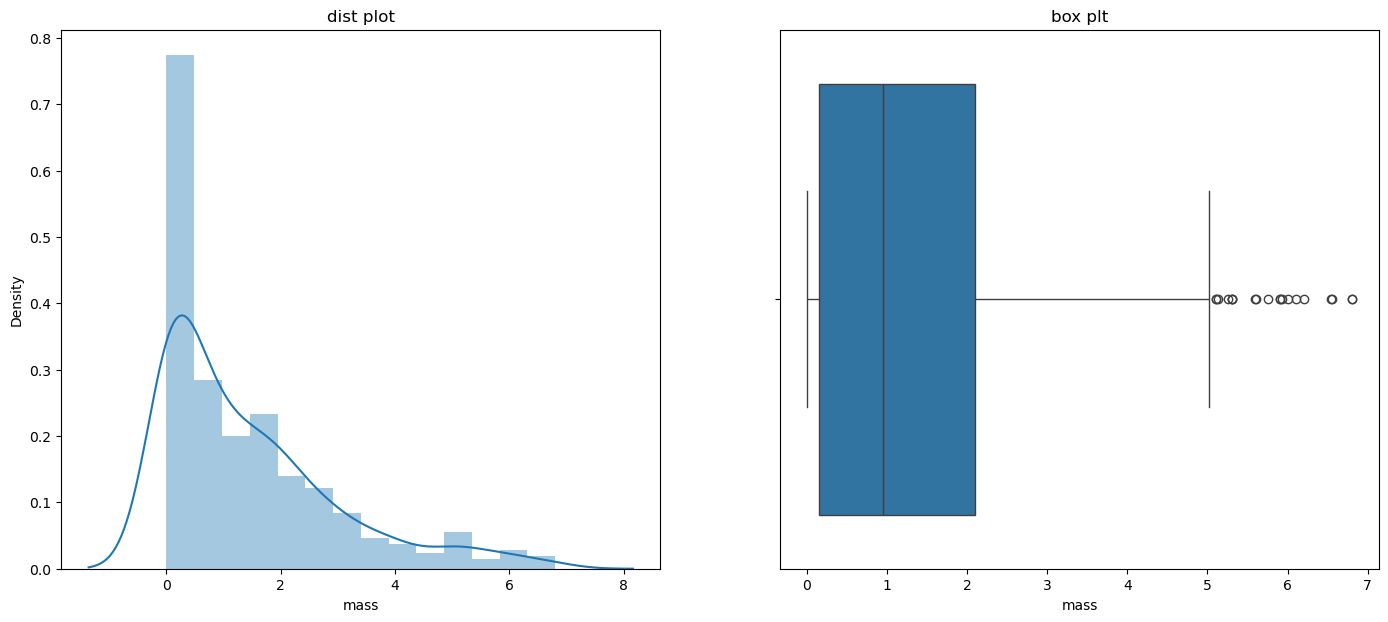

In [173]:
plt.figure(figsize = (17, 7))
plt.subplot(1,2,1)
sns.distplot(df['mass'])
plt.title("dist plot")

plt.subplot(1,2,2)
sns.boxplot(data = df , x = 'mass')
plt.title("box plt")
plt.show()

In [175]:
df.shape

(442, 6)

In [187]:
df['mass'] = np.where((df.mass >= upper_fence) | (df.mass <= lower_fence), df['mass'].median() , df['mass'])

In [189]:
df

,method,number,orbital_period,mass,distance,year
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
5,Radial Velocity,1,185.84000,4.800,76.39,2008
6,Radial Velocity,1,1773.40000,4.640,18.15,2002
9,Radial Velocity,2,452.80000,1.990,74.79,2010
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


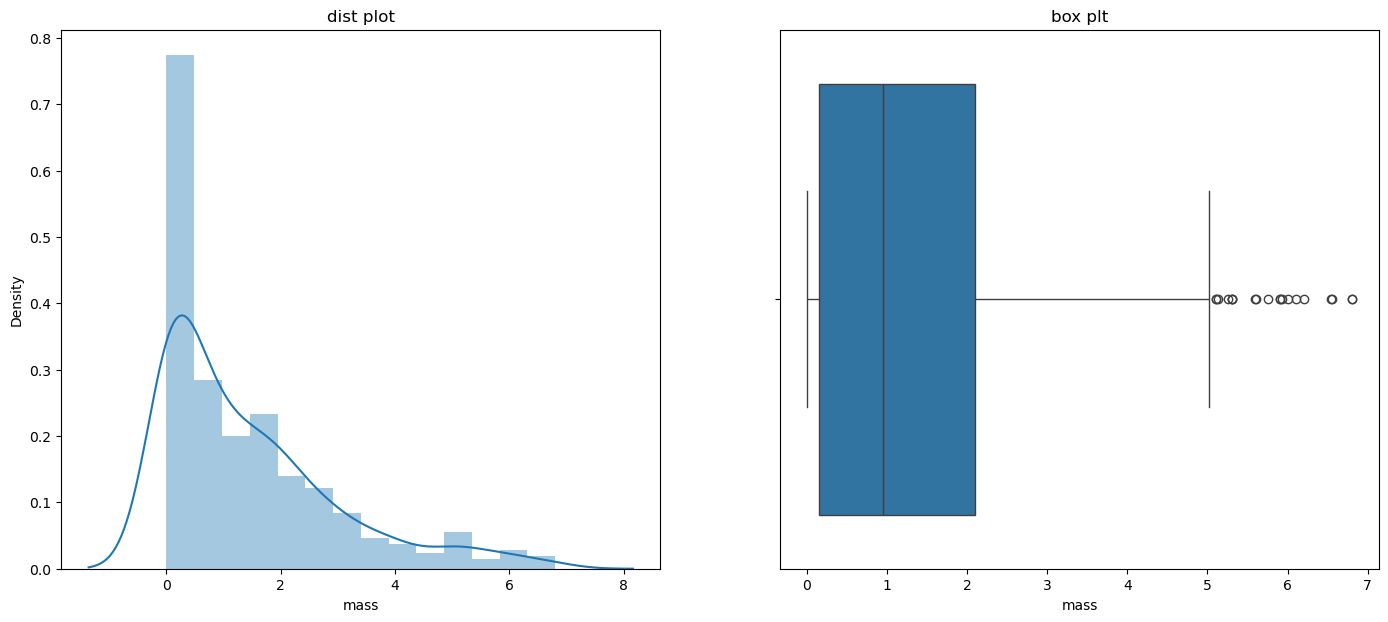

In [191]:
plt.figure(figsize = (17, 7))
plt.subplot(1,2,1)
sns.distplot(df['mass'])
plt.title("dist plot")

plt.subplot(1,2,2)
sns.boxplot(data = df , x = 'mass')
plt.title("box plt")
plt.show()